In [1]:
import numpy as np
import jupyter
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
# compute the loss
def loss(w, x, y):
    y_predict = np.dot(x,w)
    loss=np.power((y_predict-y),2).sum()/2
    return loss


In [3]:
# compute the gradient
def gradient(w, x, y):
    temp = np.subtract(np.dot(x, w), y)
    grad = np.dot(x.T, temp)
    grad /= y.shape[0]
    return grad

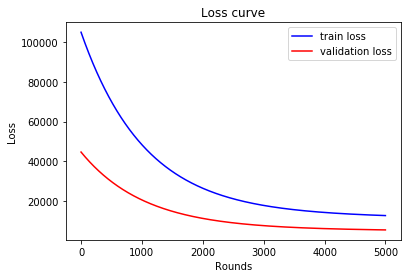

In [4]:
# Load the experiment data
x, y = load_svmlight_file("housing_scale")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train, x_test = x_train.toarray(), x_test.toarray()
y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))

# Initialize parameter  
# learning rate
alpha = 0.0001
#iteration
iteration=5000
feature_num = x_train.shape[1]
x_train = np.c_[x_train, np.ones((x_train.shape[0], 1))]
x_test = np.c_[x_test, np.ones((x_test.shape[0], 1))]
#weight
w = np.zeros((feature_num + 1, 1))

loss_train = [] # train loss
loss_validation = [] # validation loss
for i in range(iteration):
    grad = gradient(w, x_train, y_train)
    w -= alpha * grad
    loss_train.append(loss(w, x_train, y_train))
    loss_validation.append(loss(w, x_test, y_test))

pyplot.title('Loss curve')
pyplot.xlabel('Rounds')
pyplot.ylabel('Loss')
pyplot.plot(loss_train, color="blue", label="train loss")
pyplot.plot(loss_validation, color="red", label="validation loss")
pyplot.legend(loc='upper right')
pyplot.show()
